In [1]:
import os
import sys

import matplotlib.pyplot as plt  # type: ignore
import pandas as pd  # type: ignore
import seaborn as sns  # type: ignore

sys.path.append(os.path.abspath(".."))

# Fix the import path
from model.model import run

# Here are the available parameters you can set:
# 
# Core simulation parameters:
# - steps: Number of simulation steps to run (default: 250)
# - dt: Time step size (default: 0.02)
# - s_start: Initial sheep population (default: 100)
# - w_start: Initial wolf population (default: 10)
# - sheep_max: Maximum sheep capacity (default: 110)
# 
# Wolf behavior parameters:
# - no_ai: If True, wolves use fixed theta; if False, wolves use AI (default: False)
# - prompt_type: "high" or "low" (default: "high")... amount of information provided to the wolves
# - theta_star: Default theta value when no_ai=True (default: 0.5)
# - churn_rate: Percentage of wolves that update their theta each step (default: 0.05)
# - threads: Number of parallel LLM calls when using async mode (default: 5)
#
# Wolf population dynamics parameters:
# - beta: Predation rate (default: 0.1)
# - gamma: Wolf death rate (default: 1.5)
# - delta: Conversion efficiency (default: 0.75)
#
# Sheep population dynamics parameters:
# - alpha: Sheep growth rate (default: 1)
# - eps: Small value to prevent extinction (default: 0.0001)
#
# Output parameters:
# - save_results: Whether to save simulation results (default: True)
# - path: Directory to save results (default: "../data/results")



# Donʻt set no_ai or prompt_type here, it will be set in the calls below
my_args = {
    "steps": 20,
    "theta_star": 0.5,
    "churn_rate": .2,
    "dt": 0.02,
}


## High Information AI Wolves

Starting simulation at 2025-02-28 15:04:04.720353 with 20 steps.
Model params: {'alpha': 1, 'beta': 0.1, 'gamma': 1.5, 'delta': 0.75, 'theta_star': 0.5, 's_start': 100, 'w_start': 10, 'dt': 0.02, 'sheep_max': 110, 'eps': 0.0001, 'steps': 20, 'churn_rate': 0.2, 'no_ai': False, 'save_results': True, 'prompt_type': 'high'}
Model opts: {'no_ai': False, 'model_name': 'model', 'models': [], 'churn_rate': 0.2, 'save_results': True, 'path': '../data/results', 'prompt_type': 'high'}
Domain starting sheep: 100
Agents starting wolves: 10
Step 0: net_wolves_change: 0
Step 1: net_wolves_change: 1
Step 2: net_wolves_change: 1
Step 3: net_wolves_change: 1
Step 4: net_wolves_change: 1
Step 5: net_wolves_change: 1
Step 6: net_wolves_change: 1
Step 7: net_wolves_change: 1
Step 8: net_wolves_change: 1
Step 9: net_wolves_change: 1
Step 10: net_wolves_change: 2
Step 11: net_wolves_change: 1
Step 12: net_wolves_change: 2
Step 13: net_wolves_change: 1
Step 14: net_wolves_change: 2
Step 15: net_wolves_change:

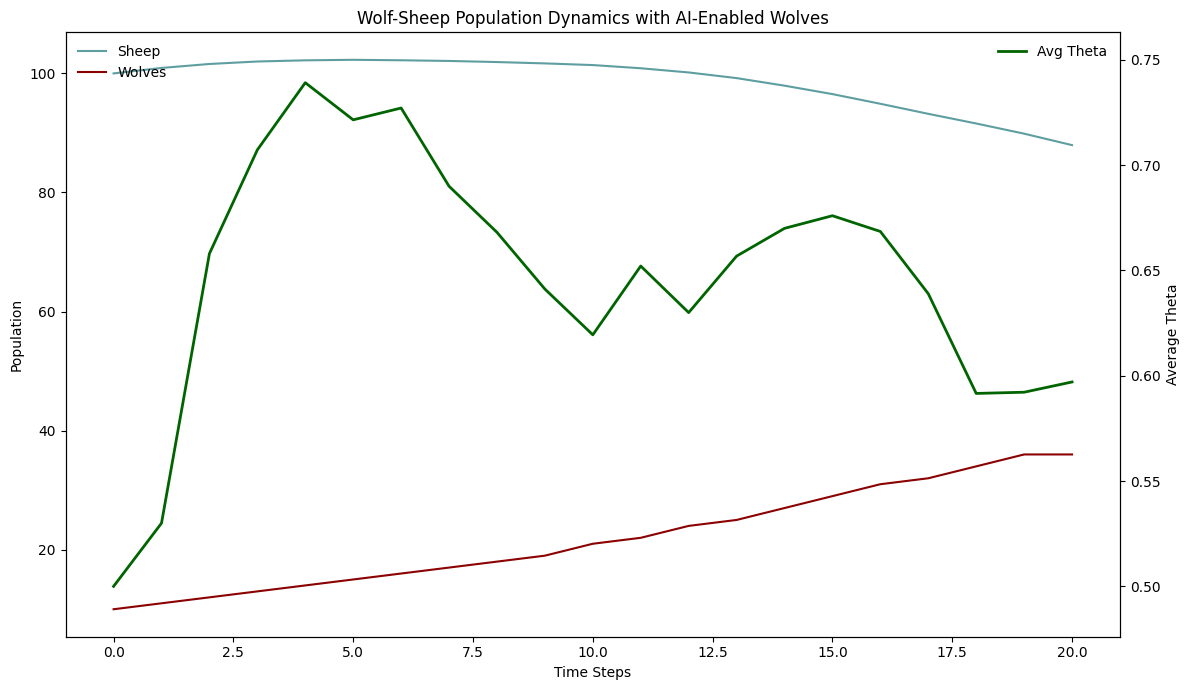

In [2]:
# Run model with AI-enabled wolves
ai_results = run(
    **my_args,
    no_ai=False,
    save_results=True,
    prompt_type="high"
)

# Print some information about the results
print(f"Final sheep population: {ai_results['sheep_history'][-1]}")
print(f"Final wolf population: {ai_results['wolf_history'][-1]}")
print(f"Thetas: {ai_results['average_theta_history']}")

## Low Information Prompted AI Wolves

Starting simulation at 2025-02-28 15:05:03.924907 with 20 steps.
Model params: {'alpha': 1, 'beta': 0.1, 'gamma': 1.5, 'delta': 0.75, 'theta_star': 0.5, 's_start': 100, 'w_start': 10, 'dt': 0.02, 'sheep_max': 110, 'eps': 0.0001, 'steps': 20, 'churn_rate': 0.2, 'no_ai': False, 'save_results': True, 'prompt_type': 'low'}
Model opts: {'no_ai': False, 'model_name': 'model', 'models': [], 'churn_rate': 0.2, 'save_results': True, 'path': '../data/results', 'prompt_type': 'low'}
Domain starting sheep: 100
Agents starting wolves: 10
Step 0: net_wolves_change: 0
Step 1: net_wolves_change: 1
Step 2: net_wolves_change: 0
Step 3: net_wolves_change: 1
Step 4: net_wolves_change: 1
Step 5: net_wolves_change: 1
Step 6: net_wolves_change: 1
Step 7: net_wolves_change: 0
Step 8: net_wolves_change: 1
Step 9: net_wolves_change: 1
Step 10: net_wolves_change: 1
Step 11: net_wolves_change: 2
Step 12: net_wolves_change: 1
Step 13: net_wolves_change: 1
Step 14: net_wolves_change: 1
Step 15: net_wolves_change: 2

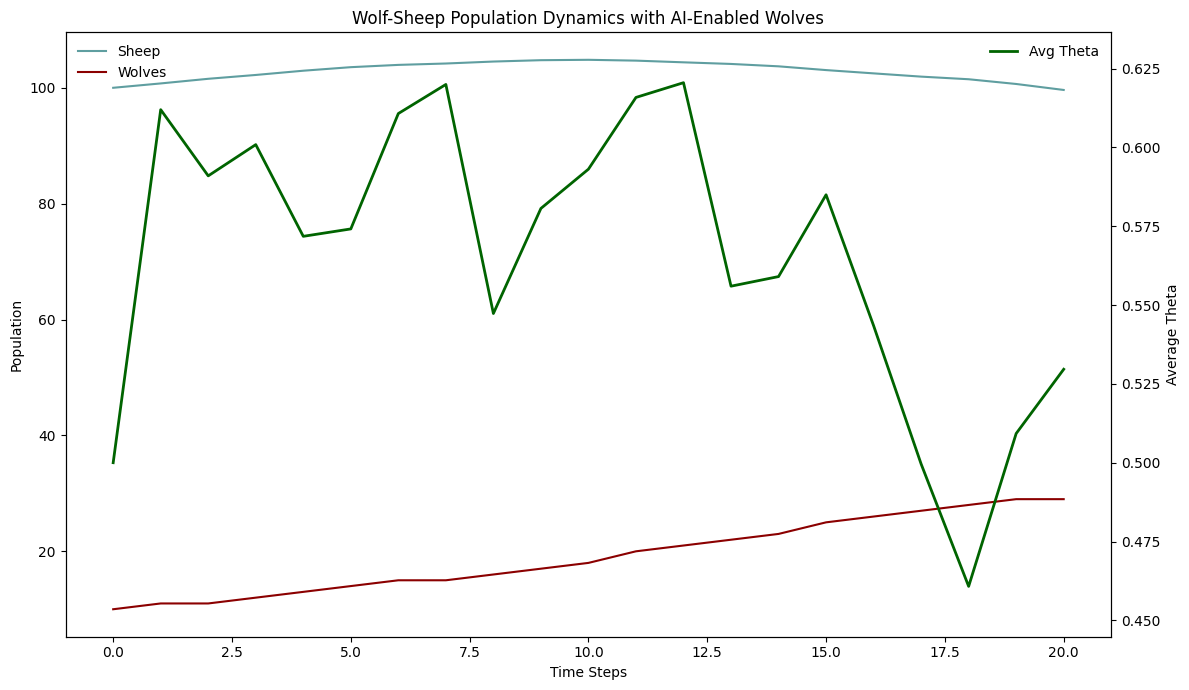

In [3]:
# Run model with AI-enabled wolves
ai_results_low = run(
    **my_args,
    no_ai=False,
    save_results=True,
    prompt_type="low"
)

# Print some information about the results
print(f"Final sheep population: {ai_results_low['sheep_history'][-1]}")
print(f"Final wolf population: {ai_results_low['wolf_history'][-1]}")
print(f"Thetas: {ai_results_low['average_theta_history']}")

## Functional Wolves (no_ai)

Starting simulation at 2025-02-28 15:06:00.684801 with 20 steps.
Model params: {'theta': 0.5, 'alpha': 1, 'beta': 0.1, 'gamma': 1.5, 'delta': 0.75, 'theta_star': 0.5, 's_start': 100, 'w_start': 10, 'dt': 0.02, 'sheep_max': 110, 'eps': 0.0001, 'steps': 20, 'churn_rate': 0.2, 'no_ai': True, 'save_results': True}
Model opts: {'no_ai': True, 'model_name': 'model', 'models': [], 'churn_rate': 0.2, 'save_results': True, 'path': '../data/results', 'prompt_type': 'high'}
Domain starting sheep: 100
Agents starting wolves: 10
Step 0: Processing with sheep_state=100, sheep_max=110
Step 0: Calculating theta using the function
  Parameters: k=1.0, s0=110, epsilon=0.0001, sheep_state=100
  Calculated theta: 0.4762
Step 0: Calculating theta using the function
  Parameters: k=1.0, s0=110, epsilon=0.0001, sheep_state=100
  Calculated theta: 0.4762
Step 0: Calculating theta using the function
  Parameters: k=1.0, s0=110, epsilon=0.0001, sheep_state=100
  Calculated theta: 0.4762
Step 0: Calculating thet

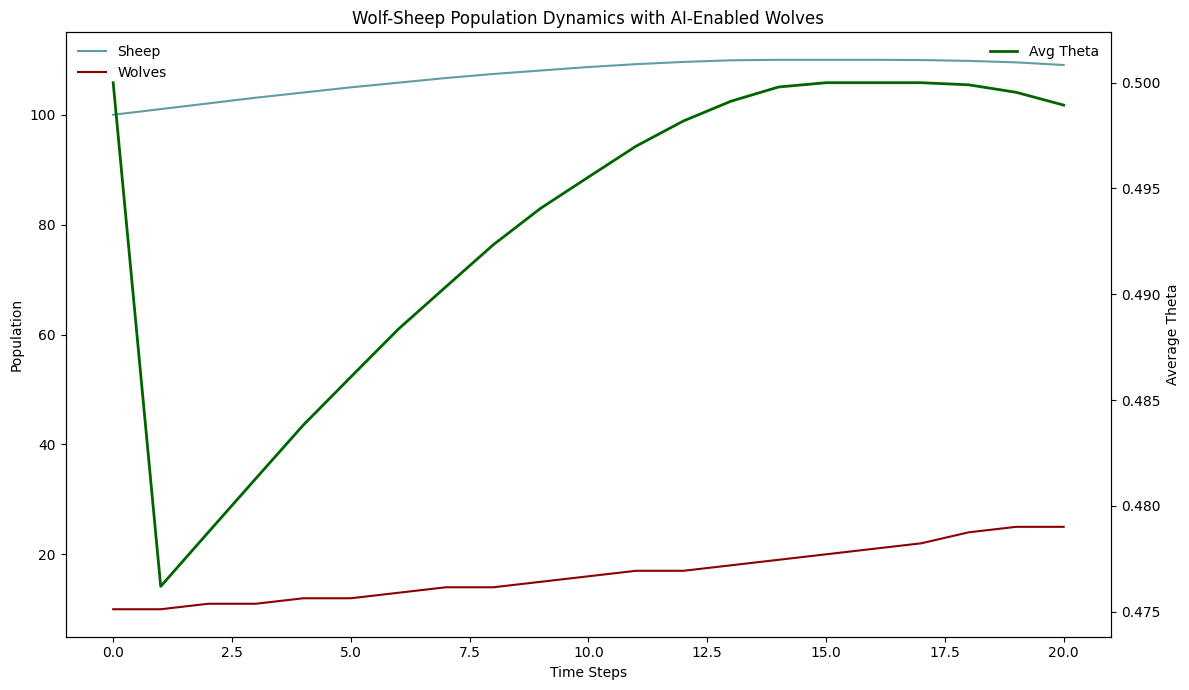

In [4]:
# Run model with no_ai=True (note the correct keyword argument syntax)
results = run(
    **my_args,
    no_ai=True,
    save_results=True
    )